# Machine Learning : Linear Regression Model

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
%matplotlib inline

In [24]:
dr=pd.read_csv('USA_Housing.csv')

In [25]:
dr.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [26]:
dr.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [32]:
dr.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# EDA

In [33]:
sns.pairplot(dr['Price'])

TypeError: 'data' must be pandas DataFrame object, not: <class 'pandas.core.series.Series'>

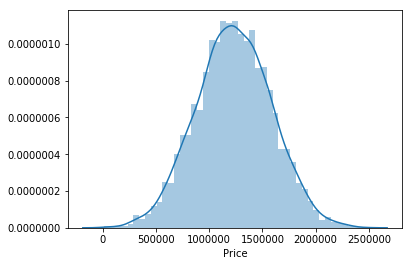

In [34]:
#check distribution of the price
sns.distplot(dr['Price'])

average price of the distrution came in between 1 million to 1.5 million

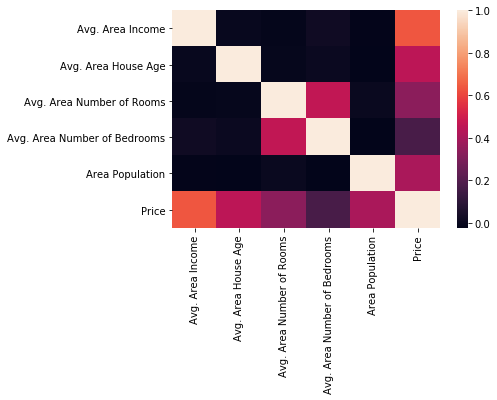

In [35]:

sns.heatmap(dr.corr())

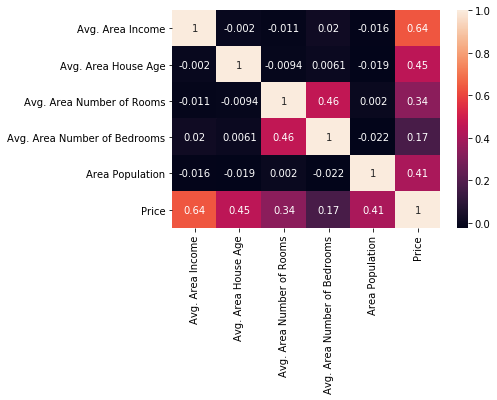

In [36]:
#to see actual no of correlation
sns.heatmap(dr.corr(),annot=True)

In [37]:
dr.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [38]:
#Selecting features
X=dr[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [39]:
#target variable : which we have to predict
y=dr['Price']

In [42]:
from sklearn.model_selection import train_test_split

In [44]:
#test size is the percentage of the test size that you want to be allocated
#random_state is a set of random splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lr=LinearRegression()

In [48]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Model Evaluation

In [49]:
#evaluate the model by checking out its coefficients and how we can interpret them

In [50]:
#print the intercept
print(lr.intercept_)

-2640159.796851911


In [53]:
#coeff means increament in each features per x unit and x is the coeff.
coeff_dr=pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_dr

,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


# predictions from model

In [54]:
prediction=lr.predict(X_test)

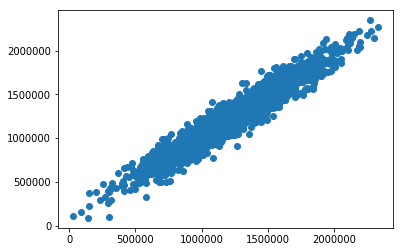

In [56]:
#this is used to verify the model used here is going on with the actual case, if the model is not satisfying then the dotss will be off the line 
plt.scatter(y_test,prediction)

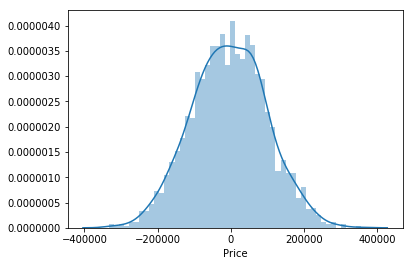

In [57]:
#this is also used to verify the model if there is unrelavant behaviour is approaching then the bars will go off.
sns.distplot((y_test-prediction),bins=50)

In [58]:
from sklearn import metrics

In [59]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 82288.22251914957
MSE: 10460958907.209501
RMSE: 102278.82922291153
